In [52]:
from generate_hnb import generate_hnb
from generate_ZI import generate_ZI
from AIC_BIC import calculate_aic_bic

k=3
n=1000
beta0=gamma0=0
alpha0=1
beta1=100
gamma1=100
alpha1=2
data = generate_ZI(n=n, k=k, beta0=beta0, beta1=beta1, gamma0=gamma0, gamma1=gamma1, alpha0=alpha0, alpha1=alpha1, r=10, cov_type="nbinary")


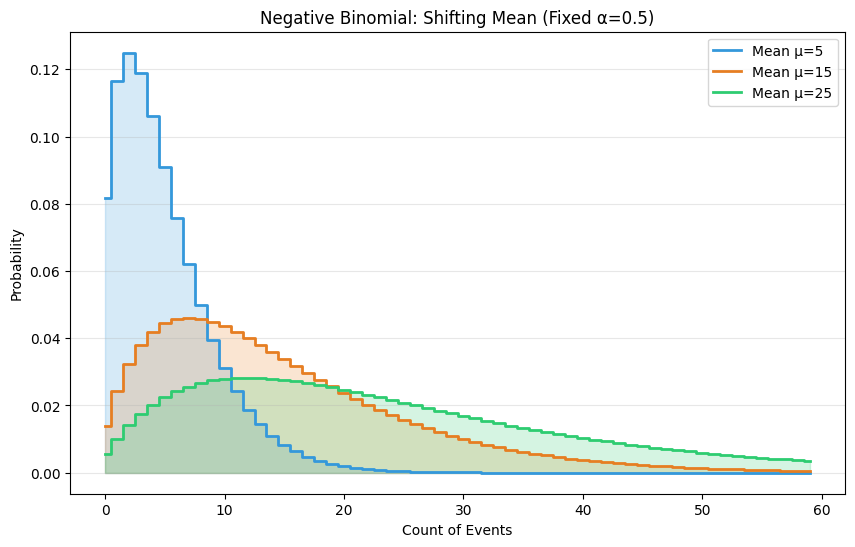

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

def plot_mu_variation(mu_list=[5, 15, 25], alpha=0.5):
    # Range of counts to plot
    x = np.arange(0, 60)
    plt.figure(figsize=(10, 6))

    colors = ['#3498db', '#e67e22', '#2ecc71']
    
    for mu, color in zip(mu_list, colors):
        # Convert (mu, alpha) to scipy's (n, p) parameters
        # n = 1/alpha, p = 1/(1 + alpha * mu)
        n = 1 / alpha
        p = 1 / (1 + alpha * mu)
        
        # Calculate Probability Mass Function (PMF)
        y = nbinom.pmf(x, n, p)
        
        # Plotting
        plt.step(x, y, where='mid', label=f'Mean μ={mu}', color=color, lw=2)
        plt.fill_between(x, y, step="mid", alpha=0.2, color=color)

    plt.title(f'Negative Binomial: Shifting Mean (Fixed α={alpha})')
    plt.xlabel('Count of Events')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.show()

plot_mu_variation()


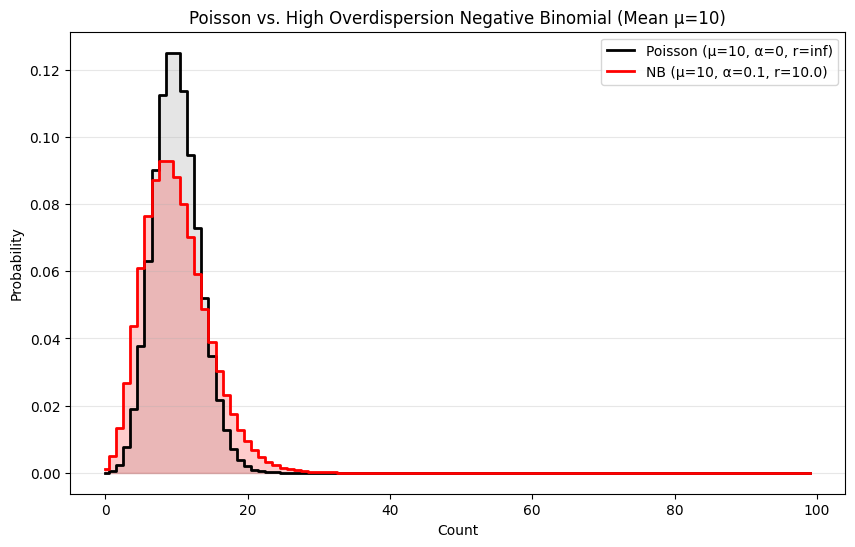

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom, poisson

def compare_high_alpha(mu=10, alpha=1):
    # Range of counts to display (NB with alpha=10 has a very long tail)
    x = np.arange(0, 100)
    
    # 1. Poisson Distribution (Baseline: Variance = Mean)
    y_poisson = poisson.pmf(x, mu)
    
    # 2. Negative Binomial (Variance = mu + alpha * mu^2)
    # Convert mu and alpha to scipy's n and p
    n = 1 / alpha
    p = 1 / (1 + alpha * mu)
    y_nb = nbinom.pmf(x, n, p)
    
    # Visualization
    plt.figure(figsize=(10, 6))
    
    plt.step(x, y_poisson, where='mid', label=f'Poisson (μ={mu}, α=0, r=inf)', color='black', lw=2)
    plt.fill_between(x, y_poisson, step="mid", alpha=0.1, color='black')
    
    plt.step(x, y_nb, where='mid', label=f'NB (μ={mu}, α={alpha}, r={1/alpha})', color='red', lw=2)
    plt.fill_between(x, y_nb, step="mid", alpha=0.2, color='red')
    
    plt.title(f'Poisson vs. High Overdispersion Negative Binomial (Mean μ={mu})')
    plt.xlabel('Count')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.show()

r=10
compare_high_alpha(alpha=1/r)


In [17]:
data

,y,x,w
0,0,0.498361,0
1,0,-0.164522,0
2,3,0.655970,3
3,72,1.569778,4
4,0,-0.264625,0
...,...,...,...
995,0,-0.313635,0
996,73,1.856504,4
997,0,0.648823,0
998,3,-0.616461,3


In [23]:
data['w'].value_counts()

w
0    698
3    270
4     32
Name: count, dtype: int64

In [24]:
data.describe()

,y,x,w
count,1000.000000,1.000000e+03,1000.000000
mean,0.823000,2.398082e-17,0.938000
std,1.332459,1.022247e+00,1.436739
min,0.000000,-3.403886e+00,0.000000
25%,0.000000,-6.962302e-01,0.000000
50%,0.000000,6.230844e-03,0.000000
75%,3.000000,6.562361e-01,3.000000
max,3.000000,4.001858e+00,4.000000


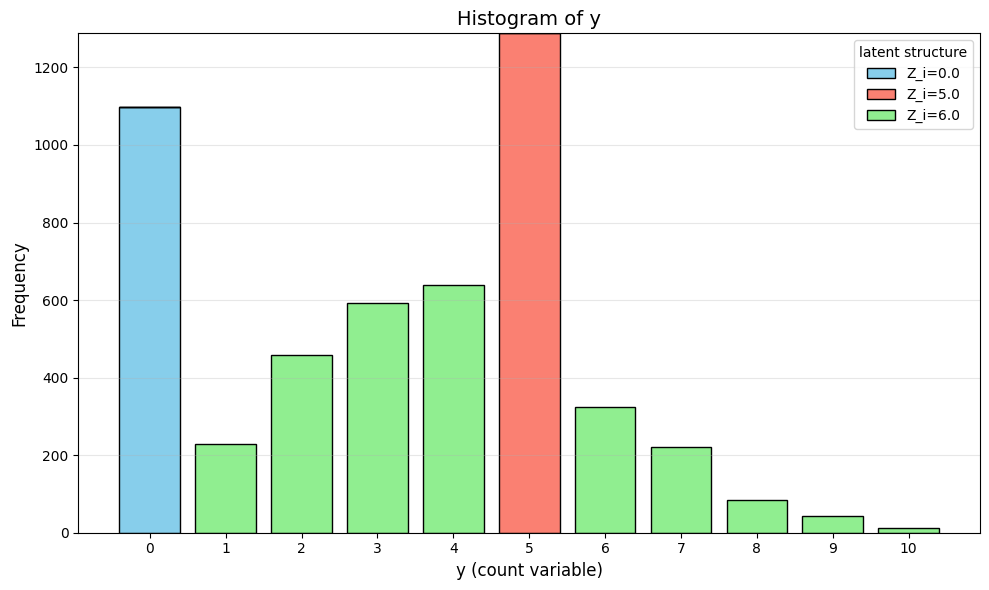

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming you have y and w arrays of same length
# Example data generation if you don't have actual data:
np.random.seed(42)
y = data# count variable (0-9)
w=np.zeros(len(data))
w[y==0]=0
w[y==k]=k
w[(y!=0) & (y!=k)]=k+1 # categorical variable with 3 values

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique values in w and create colors
w_values = np.unique(w)
colors = ['skyblue', 'salmon', 'lightgreen']  # custom colors
# Or use a colormap: colors = plt.cm.Set2(np.linspace(0, 1, len(w_values)))

# Calculate bin edges (one bin for each integer count)
y_min, y_max = 0, 10
bins = np.arange(y_min, y_max + 2) - 0.5  # centers bins on integers

# Plot stacked histogram
bottom = np.zeros(len(bins) - 1)
for w_val, color in zip(w_values, colors):
    # Filter y values for current w value
    y_subset = y[w == w_val]
    
    # Calculate histogram
    counts, _ = np.histogram(y_subset, bins=bins)
    
    # Plot
    ax.bar(np.arange(y_min, y_max + 1), counts, bottom=bottom, 
           color=color, label=f'Z_i={w_val}', edgecolor='black', width=0.8)
    
    # Update bottom for stacking
    bottom += counts

# Customize plot
ax.set_xlabel('y (count variable)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Histogram of y', fontsize=14)
ax.set_xticks(np.arange(y_min, y_max + 1))
ax.legend(title='latent structure')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_zkip_data(mu=4, k=5, pi1=0.2, pi2=0.15, size=1000):
    """
    mu: Poisson mean (lambda)
    k: The second inflated value (e.g., k=5)
    pi1: Probability of structural zero
    pi2: Probability of structural k
    """
    pi3 = 1 - pi1 - pi2 # Probability of being from Poisson process
    
    # 1. Randomly assign each sample to a component: 0, k, or Poisson
    # component 0: structural zero, 1: structural k, 2: Poisson
    components = np.random.choice([0, 1, 2], size=size, p=[pi1, pi2, pi3])
    
    # 2. Generate data based on assigned component
    data = np.zeros(size)
    z = np.zeros(size)
    for i in range(size):
        if components[i] == 0:
            data[i] = 0
            z[i] = 0
        elif components[i] == 1:
            data[i] = k
            z[i] = k
        else:
            data[i] = np.random.poisson(mu)
            z[i] = k+1
            
    return data, z

# Example: 20% extra zeros, 15% extra 5s, Poisson mean 4
mu, k, pi1, pi2 = 4, 5, 0.2, 0.15
data, z = generate_zkip_data(mu=mu, k=k, pi1=pi1, pi2=pi2, size=5000)

# Visualize
plt.hist(data, bins=range(int(max(data))+2), alpha=0.7, color='indigo', edgecolor='black')
plt.title(f"Zero-and-{k}-Inflated Poisson (μ={mu}, π1={pi1}, π2={pi2})")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()


IndexError: list assignment index out of range

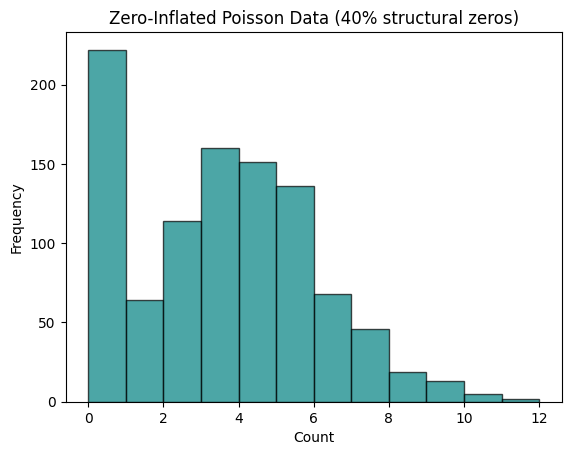

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def generate_zip_data(mu=5, psi=0.3, size=1000):
    """
    mu: Poisson mean (lambda)
    psi: Probability of a structural zero (inflation level)
    """
    # 1. Generate standard Poisson counts
    poisson_counts = np.random.poisson(lam=mu, size=size)
    
    # 2. Generate Bernoulli 'mask' (1 = count process, 0 = structural zero)
    # Note: We use (1 - psi) as the probability of the Poisson process
    mask = np.random.binomial(n=1, p=1-psi, size=size)
    
    # 3. Combine to get ZIP data
    zip_data = poisson_counts * mask
    return zip_data, mask

# Generate data
data, mask = generate_zip_data(mu=4, psi=0.2, size=1000)

# Visualize
plt.hist(data, bins=range(max(data)+2), alpha=0.7, color='teal', edgecolor='black')
plt.title("Zero-Inflated Poisson Data (40% structural zeros)")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

In [ ]:
X = y.loc[:, 'x'].values
y = y.loc[:, 'y'].values

In [3]:
import statsmodels.api as sm
import pandas as pd
X=sm.add_constant(X)
X=pd.DataFrame(X, columns=['intercept', 'x'])
y=pd.DataFrame(y, columns=['y'])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    
# Add intercept column

# Prepare features and target
features = X.loc[:, ['intercept', 'x']]     
target = y['y']
    
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
        features, target, test_size=0.3, random_state=42
)

In [5]:
y_train.head()

194    0
101    0
68     0
224    4
37     0
Name: y, dtype: int64

In [6]:
X_train.head()

,intercept,x
194,1.0,-0.025017
101,1.0,1.549940
68,1.0,-0.358495
224,1.0,0.410625
37,1.0,-0.778674


In [7]:
X.loc[0:1,['intercept','x']]

,intercept,x
0,1.0,-1.554753
1,1.0,-0.135176


In [8]:
poi_k=2
nb_k=2 # if r unknown 2+1=3
zip_k=2+2
zinb_k=2+2+1 # if r known 2+2=4
zkip_k=2+2+2
zkinb_k=2+2+2+1 # if r known 2+2+2=6
zkhurdle_poi_k=2+2
zkicmp_k=2+2+2+1

In [9]:
X_test.shape[0]

90

In [10]:
from models.ZKIHurdlePoisson import ZKHurdlePoisson

ZKIHP=ZKHurdlePoisson(k)
ZKIHP.fit(X_train, y_train)
p0,pk,po=ZKIHP.predict_probs(X_train)
y_pred=ZKIHP.predict_mean(X_test)
ll=ZKIHP.loglikelihood(X_train, y_train)
ZKIHP_mse=mean_squared_error(y_test, y_pred)
ZKIHP_mae=mean_squared_error(y_test, y_pred)
ZKIHP_r2=r2_score(y_test, y_pred)
lol=calculate_aic_bic(n=X_train.shape[0], log_likelihood=ll, k=zkhurdle_poi_k)
ll, ZKIHP_mse, ZKIHP_mae, ZKIHP_r2, lol


                  0         1
intercept -1.422528 -0.644361
x          0.359331 -0.017312
                  0         1
intercept -1.422528 -0.644361
x          0.359331 -0.017312
                  0         1
intercept -1.422528 -0.644361
x          0.359331 -0.017312


(-305.17195093265286,
 2.771635093321161,
 2.771635093321161,
 0.05691055425745006,
 (618.3439018653057, 631.7323319881756))

In [14]:
y_t=pd.DataFrame({"X_train": X_train.iloc[:,1], "y_train":y_train, "p0":p0,"pk":pk,"po":po})

In [15]:
y_t[y_t['y_train']==0].head()

,X_train,y_train,p0,pk,po
68,1.551217,0,0.538365,0.291076,0.170560
274,0.495947,0,0.574211,0.186668,0.239120
67,0.182010,0,0.577650,0.161413,0.260937
228,-0.378721,0,0.576169,0.122865,0.300966
69,-1.901607,0,0.532653,0.054512,0.412834


In [16]:
y_t[y_t['y_train']==3].head()

,X_train,y_train,p0,pk,po
101,0.694823,3,0.570349,0.204068,0.225583
224,-0.966943,3,0.565307,0.090785,0.343908
147,0.191376,3,0.577594,0.162127,0.260279
31,-1.137875,3,0.560602,0.082908,0.356489
183,0.540918,3,0.573454,0.190508,0.236038


In [17]:
y_t[(y_t['y_train']!=3) & (y_t['y_train']!=0)].head()

,X_train,y_train,p0,pk,po
194,1.145027,7,0.556641,0.247437,0.195921
37,-2.079870,1,0.524768,0.049283,0.425949
16,0.322958,5,0.576502,0.172418,0.251080
179,0.716976,5,0.569836,0.206074,0.224090
181,-1.489411,1,0.549034,0.068540,0.382426


In [ ]:
from models.ZKIHurdleNB import ZKHurdleNB
r=10
ZKIHNB=ZKHurdleNB(k, alpha=0.1)
ZKIHNB.fit(X_train, y_train)
y_pred=ZKIHNB.predict_mean(X_test)
ll=ZKIHNB.loglikelihood(X_train, y_train)
ZKIHNB_mse=mean_squared_error(y_test, y_pred)
ZKIHNB_mae=mean_squared_error(y_test, y_pred)
ZKIHNB_r2=r2_score(y_test, y_pred)
lol=calculate_aic_bic(n=X_train.shape[0], log_likelihood=ll, k=zkhurdle_poi_k)
ll, ZKIHNB_mse, ZKIHNB_mae, ZKIHNB_r2, lol

(np.float64(-397.740213404084),
 2.5333654003143997,
 2.5333654003143997,
 0.02729144185880572,
 (np.float64(803.480426808168), np.float64(816.8688569310378)))

In [8]:
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import SET_USE_BIC_LLF
SET_USE_BIC_LLF(True)

poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
poisson_pred = poisson_model.predict(X_test)
poisson_mse = mean_squared_error(y_test, poisson_pred)
poisson_mae = mean_absolute_error(y_test, poisson_pred)
poisson_r2 = r2_score(y_test, poisson_pred)  
poisson_llf = poisson_model.llf  # Log-likelihood at maximum
poisson_aic = poisson_model.aic  # AIC = -2*LL + 2*df_model
poisson_bic = poisson_model.bic  # BIC = -2*LL + log(n)*df_model
lol=calculate_aic_bic(n=X_train.shape[0], log_likelihood=poisson_llf, k=poi_k)
poisson_mse, poisson_mae, poisson_r2, poisson_llf, poisson_aic, poisson_bic, lol

(2.8093667667712685,
 1.3159724297759299,
 -0.0047185664200306565,
 -393.11787149813756,
 790.2357429962751,
 796.9299580577101,
 (790.2357429962751, 796.9299580577101))

In [9]:
nb2_model = sm.NegativeBinomial(y_train, X_train).fit()
nb_pred = nb2_model.predict(X_test)
nb_mse = mean_squared_error(y_test, nb_pred)
nb_mae = mean_absolute_error(y_test, nb_pred)
nb_r2 = r2_score(y_test, nb_pred)
# Get log-likelihood
nb_llf = nb2_model.llf  # Log-likelihood at maximum
nb_aic = nb2_model.aic  # AIC
nb_bic = nb2_model.bic  # BIC
lol=calculate_aic_bic(n=X_train.shape[0], log_likelihood=nb_llf, k=3)
nb_mse, nb_mae, nb_r2, nb_llf, lol, nb_aic, nb_bic

Optimization terminated successfully.
         Current function value: 1.707737
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9


(2.810297234549371,
 1.3160551043762758,
 -0.00505133117797274,
 -358.6246701101842,
 (723.2493402203684, 733.2906628125207),
 723.2493402203684,
 733.2906628125207)

In [7]:
from models.HurdlePoisson import ZeroKInflatedPoisson as ZKIHurdle

# ZeroKInflatedPoissonHurdle Model
model=ZKIHurdle(k=3)
res=model.fit(X_train, y_train)
ll=model.loglikelihood(X_train, y_train)
y_pred=model.predict_mean(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
lol=calculate_aic_bic(n=X_train.shape[0], log_likelihood=ll, k=zkhurdle_poi_k)
mse, mae, r2, ll, lol

(3.507174706250426,
 1.2642052736569527,
 0.0552357870022796,
 np.float64(-308.73214619262046),
 (np.float64(625.4642923852409), np.float64(638.8527225081108)))

In [10]:
from models.ZINB import ZINB_EM as ZINB_EM
from models.ZINB import predict_mean as ZINB_pred_mean

#ZINB
alpha=1/10
beta, gamma, fll = ZINB_EM(y_train.values, X_train.values, X_train.values, alpha) # alpha is a problem
mean_pred = ZINB_pred_mean(X_test.values, X_test.values, beta, gamma)
mse = mean_squared_error(y_test, mean_pred)
mae = mean_absolute_error(y_test, mean_pred)
r2 = r2_score(y_test, mean_pred)
lol=calculate_aic_bic(n=X_train.shape[0], log_likelihood=fll, k=zinb_k)
mse, mae, r2, fll, lol

(1.9342793942215903,
 1.1140107102879762,
 0.0021232346223245546,
 np.float64(-326.97649310487293),
 (np.float64(663.9529862097459), np.float64(680.6885238633332)))

In [12]:
from models.ZIP import ZIP_EM as ZIP_EM
from models.ZIP import predict_mean as ZIP_pred_mean

#ZIP
beta, gamma, fll = ZIP_EM(y_train.values, X_train.values, X_train.values)
mean_pred = ZIP_pred_mean(X_test.values, X_test.values, beta, gamma)
mse = mean_squared_error(y_test, mean_pred)
mae = mean_absolute_error(y_test, mean_pred)
r2 = r2_score(y_test, mean_pred)
lol=calculate_aic_bic(n=X_train.shape[0], log_likelihood=fll, k=zip_k)
mse, mae, r2, fll, lol

(2.9760734112929437,
 1.266697392815185,
 -0.06433814435396035,
 -324.5271363651276,
 (657.0542727302552, 670.4427028531251))

In [13]:
from models.ZKINB import ZkINB_EM

model = ZkINB_EM()
res = model.fit_em(y_train, X_train.values, X_train.values, k)
y_pred_inb=model.predict(X_test.values, X_test.values)
mse = mean_squared_error(y_test, y_pred_inb)
mae = mean_absolute_error(y_test, y_pred_inb) 
r2 = r2_score(y_test, mean_pred)
lol=calculate_aic_bic(n=X_train.shape[0], log_likelihood=res['final_loglik'], k=zkinb_k)
mse, mae, r2, res['final_loglik'], lol

(2.992395222094953,
 1.26437731600578,
 -0.06433814435396035,
 -322.9048894704406,
 (659.8097789408812, 683.2395316559034))

In [14]:
from models.ZKIP import ZKIP_EM

model = ZKIP_EM(k_inflated=k)
res = model.fit(X_train.values, y_train.values)
y_pred_inb=model.predict_expected(X_test.values)
mse = mean_squared_error(y_test, y_pred_inb)
mae = mean_absolute_error(y_test, y_pred_inb) 
r2 = r2_score(y_test, mean_pred)
lol=calculate_aic_bic(n=X_train.shape[0], log_likelihood=res.final_loglik, k=zkinb_k)
mse, mae, r2, res.final_loglik, lol

(5.19131929234967,
 1.5615464298565191,
 -0.06433814435396035,
 -360.5340887405499,
 (735.0681774810998, 758.4979301961221))

In [ ]:
from models.ZkICMP import ZkICMP

zkicmp_model = ZkICMP(k=k)
res = zkicmp_model.fit(X_train.values, y_train.values)
pred_results = zkicmp_model.predict(X_test.values)
_, _, zkicmp_predictions, _ = pred_results
zkicmp_mse = mean_squared_error(y_test, zkicmp_predictions)
zkicmp_mae = mean_absolute_error(y_test, zkicmp_predictions)
zkicmp_r2 = r2_score(y_test, zkicmp_predictions)
lol=calculate_aic_bic(n=X_train.shape[0], log_likelihood=-res.final_loglik, k=zkicmp_k)

zkicmp_mse, zkicmp_mae, zkicmp_r2, -res.final_loglik, lol

(5.197050586703708,
 1.5622435823112073,
 -0.8586299506512445,
 -360.53332913235056,
 (735.0666582647011, 758.4964109797234))

In [11]:
a={
    'a':5
}
b={
    'b':3
}


In [15]:
z={}
for i in range(0,10):
    z[f'{i}']=i

In [21]:
c=a | b

In [22]:
c

{'a': 5, 'b': 3}